In [2]:
import numpy as np
from random import random, sample
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display, clear_output
from parse_dataset import *
from copy import deepcopy
from time import time
import evaluation
import gym
import math
from utils import moving_avg
from agent import *
import tensorflow as tf
from icnn_tf import Agent

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
transitions = []
episodes = 1000
iterations = 100

for e in range(episodes):
    s = env.reset()
    for i in range(iterations):
        action = np.random.uniform(-1,1,(1,))
        former = env.env.state*1
        s_, reward, done, info = env.step(action)
        reward *= (reward>0)
        transitions.append((s, action, reward, s_, done))
        s = s_*1
        if done:
            break

env.reset()

array([-0.44513618,  0.        ])

In [3]:
beta0 = .9
max_steps_beta = int(5e4)
beta = lambda t: (t<max_steps_beta)*(beta0 + t*(1-beta0)/max_steps_beta) + (t>=max_steps_beta)*1.
agent = Agent(2, 1, beta, [20,20])

x shape (?, 2)
y shape (?, 1)
z shape (?, 1)
x shape (?, 2)
y shape (?, 1)
z shape (?, 1)
y shape (?,)
q shape (?,)
per weights shape (?,)
multi td error^2 per weights shape (?,)
ms td error shape ()


In [4]:
agent._fg(*[np.array([[.5,.5]]), np.array([[.5]])])

[array([ 0.00181076], dtype=float32), array([[ 0.00346481]], dtype=float32)]

In [5]:
for s,a,r,s_,done in transitions:
    agent.rm.add(*(s,a,r,s_,np.array([done])))

In [6]:
# monitoring
losses = []
td_errors = []
test_td_errors = []
test_average_q_pred = []
test_max_q_pred = []
test_min_q_pred = []
average_q_pred = []
average_q_target = []
max_q_pred = []
min_q_pred = []
max_q_target = []
min_q_target = []
average_a = []
min_a = []
max_a = []

2000 steps seen in 97.47346496582031


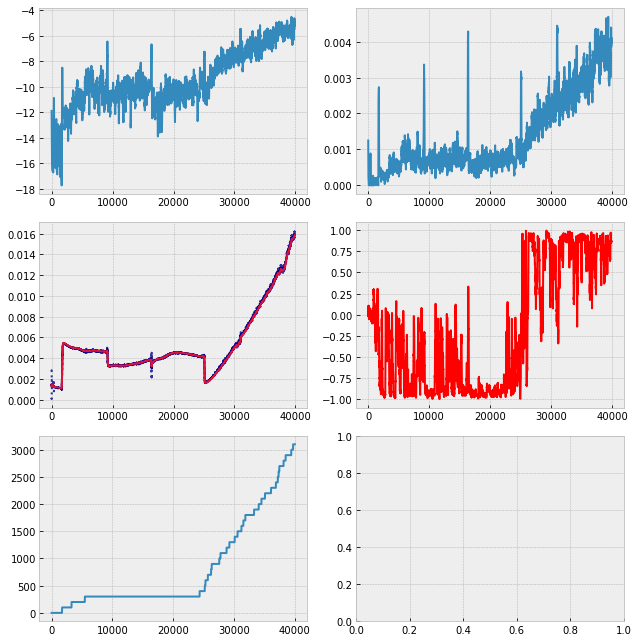

KeyboardInterrupt: 

In [7]:
plt.rcParams['figure.figsize'] = (9,9)
global_step = -1
max_steps_beta = 100000
beta0 = .9
beta = lambda t: (t<max_steps_beta)*(beta0 + t*(1-beta0)/max_steps_beta) + (t>=max_steps_beta)*1.
all_rewards = [0]

RMIN, RMAX = -1, 100

ss = env.reset()

while True:
    global_step += 1

    # act
    agent.observation = ss
    a = agent.act()
    ss_, reward, done, info = env.step(a)
    reward *= (reward>0)
    all_rewards.append(all_rewards[-1]+reward)
    agent.rm.add(*(ss, a, reward, ss_, np.array([done])))
    ss = ss_
    if done:
        ss = env.reset()
    
    loss, td_error, q_entr, q_target = agent.train()
    
    # Monitoring
    losses.append(loss.mean())
    td_errors.append(td_error.mean())
    average_q_pred.append(q_entr.mean())
    max_q_pred.append(q_entr.max())
    min_q_pred.append(q_entr.min())
    average_q_target.append(q_target.mean())
    max_q_target.append(q_target.max())
    min_q_target.append(q_target.min())
    average_a.append(a[0])
    
    # PLOT
    if global_step % 2000 == 0:
        clear_output(wait=True)
        try:
            print('2000 steps seen in %s' % str(time()-t0))
        except:
            t0 = time()
        t0 = time()

        fig, axes = plt.subplots(3, 2)
        # td error
        axes[0,0].plot(moving_avg(np.log(losses)))
        axes[0,1].plot(moving_avg(td_errors))
        # Q values (target and pred)
        axes[1,0].plot(moving_avg(average_q_pred), label='avg pred', c='darkblue')
        axes[1,0].plot(moving_avg(min_q_pred), label='min pred', c='darkblue', alpha=.8,linestyle=':')
        axes[1,0].plot(moving_avg(max_q_pred), label='max pred', c='darkblue', alpha=.8,linestyle=':')
        axes[1,0].plot(moving_avg(average_q_target), label='avg target', c='crimson')
        axes[1,0].plot(moving_avg(min_q_target), label='min target', c='crimson', alpha=.8,linestyle=':')
        axes[1,0].plot(moving_avg(max_q_target), label='max target', c='crimson', alpha=.8,linestyle=':')
        axes[1,1].plot(moving_avg(average_a), c='r')
        axes[1,1].plot(moving_avg(min_a), c='r', linestyle=':',alpha=.8)
        axes[1,1].plot(moving_avg(max_a), c='r', linestyle=':',alpha=.8)
        axes[2,0].plot(all_rewards)
        
        plt.tight_layout()
        plt.show()

$$\theta_e^{i+1} = \tau\theta_s^{i} + (1-\tau)\theta_e^{i}$$

In [53]:
average_a[-100:]

[1.0,
 0.85659151063536143,
 0.85808336607178282,
 0.99329862069346109,
 1.0,
 1.0,
 0.99080286363848624,
 0.99817429418575154,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98868997126156555,
 -1.0,
 -1.0,
 -1.0,
 0.976793318653292,
 0.94510870003355563,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98370251196126668,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98327336248229824,
 0.986939814734342,
 0.97424514667421191,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.85133057453174688,
 0.88811900426572465,
 0.70484778753528732,
 0.7060722882689221,
 0.77688715185511081,
 -1.0,
 -1.0,
 -1.0,
 0.6816581207985194,
 0.57640843419065835,
 0.47226019379836448,
 0.53845630285854829,
 0.58078428014222894,
 0.68400401916398046,
 0.84054882240894557,
 0.72394997181503573,
 0.75076570423112399,
 0.7632668981610885,
 0.60524337748730295,
 0.61202438176798868,
 0.68095658282843363,
 0.72496019546557888,
 0.61565733486759733,
 0.74002050005096198,
 0.81261394297670897,
 0.8788

In [47]:
def plot(agent, s, num=50):
    a = np.linspace(-1,1,num=num).reshape((-1,1))
    ss = np.concatenate(num*[s.reshape((1, -1))])
    return -agent._fg(*[ss, a])[0]

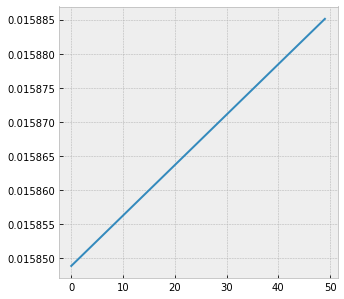

In [55]:
import tflearn
with agent.sess.as_default():
    tflearn.is_training(False)
    plt.rcParams['figure.figsize'] = (5,5)
    plt.plot(plot(agent, np.array))
    plt.show()

# load trained model

In [2]:
from icnn_tf import Agent
from agent import *
import tensorflow as tf
import tflearn
flags = tf.app.flags
FLAGS = flags.FLAGS

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:

beta0 = .9
max_steps_beta = int(5e4)
beta = lambda t: (t<max_steps_beta)*(beta0 + t*(1-beta0)/max_steps_beta) + (t>=max_steps_beta)*1.
agent = Agent(2, 1, beta, [20, 20], finalize_graph=False)
tflearn.is_training(False, session=agent.sess)

agent.restore('tensorboard/models/32314')

x shape (?, 2)
y shape (?, 1)
z shape (?, 1)
x shape (?, 2)
y shape (?, 1)
z shape (?, 1)
y shape (?,)
q shape (?,)
per weights shape (?,)
multi td error^2 per weights shape (?,)
ms td error shape ()
INFO:tensorflow:Summary name Qvalue (batch avg) is illegal; using Qvalue__batch_avg_ instead.
INFO:tensorflow:Summary name Qvalue (batch max) is illegal; using Qvalue__batch_max_ instead.
INFO:tensorflow:Summary name Qvalue (batch min) is illegal; using Qvalue__batch_min_ instead.
INFO:tensorflow:Summary name Q targets (batch avg) is illegal; using Q_targets__batch_avg_ instead.
INFO:tensorflow:Summary name Q targets (batch min) is illegal; using Q_targets__batch_min_ instead.
INFO:tensorflow:Summary name Q targets (batch max) is illegal; using Q_targets__batch_max_ instead.
INFO:tensorflow:Summary name td error is illegal; using td_error instead.
INFO:tensorflow:Summary name chosen actions is illegal; using chosen_actions instead.
INFO:tensorflow:Summary name maximizing action (batch avg)

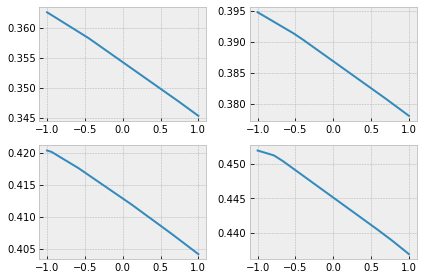

In [66]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2,2)

speeds = [-.07, -.02, .02, .07]

for i in range(2):
    for j in range(2):
        pred = -agent._fg(*[np.array(100*[[-.8, speeds[i*2+j]]]), np.linspace(-1,1,100).reshape((100,1))])[0]
        axes[i,j].plot(np.linspace(-1,1,100), pred)
plt.tight_layout()


In [4]:
import gym
env = gym.make('MountainCarContinuous-v0')
env.reset()

array([-0.40316896,  0.        ])